In [2]:
from __future__ import print_function

In [89]:
from pylab import *
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import numpy

import obspy
from obspy.imaging.cm import obspy_sequential, pqlx #colormaps
from obspy.signal.tf_misfit import cwt

from obspy.clients.fdsn import Client
client = Client("IRIS")

# 2003 Tokachi-oki Tsunami
## PG1

In [90]:
d = loadtxt('kpg1.tp.txt')
t0 = 17416.
t = (d[:,0] - t0) # seconds post event
dt = 0.1

In [91]:
kmean = where(logical_and(t>-3, t<0))[0]
pmean = mean(d[kmean,1])
print('pmean = %g, mean(d[:,1]) = %g' % (pmean,mean(d[:,1])))

pmean = 2.30335e+07, mean(d[:,1]) = 2.30272e+07


In [92]:
p = (d[:,1] - pmean) / (9.81*1025)  # excess pressure in m sea water

Text(0, 0.5, 'Excess pressure (meters of sea water)')

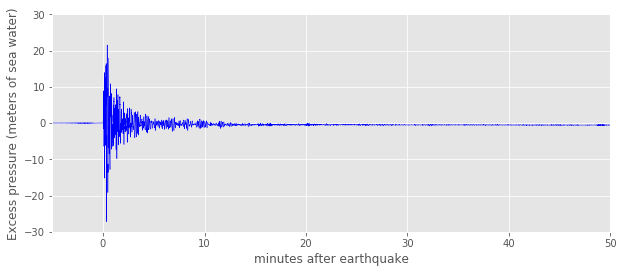

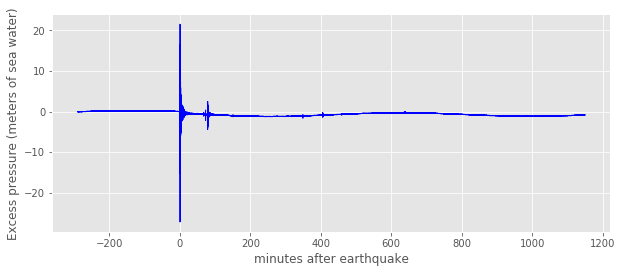

In [93]:
figure(1, figsize=(10,4))
clf()
plot(t/60.,p,'b',linewidth=0.5)
xlim(-5,50)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

figure(2, figsize=(10,4))
clf()
plot(t/60.,p,'b',linewidth=1.0)

grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

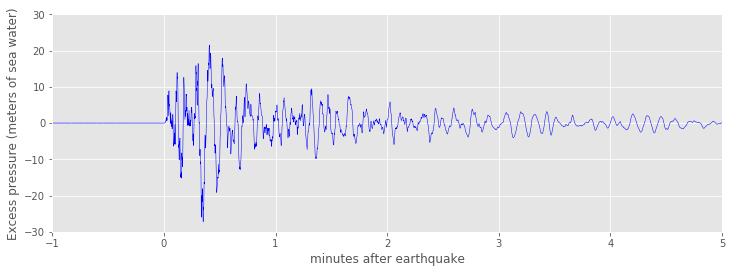

In [94]:
plt.style.use('ggplot')
figure(1, figsize=(12,4))
clf()
plot(t[173560:177161]/60.,p[173560:177161],'b',linewidth=0.5)
xlim(-1,5)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

savefig('pg1sig_png')

In [95]:
#truncating the data for the spectrogram
p_trunc = p[174160:180161]
t_trunc = t[174160:180161]

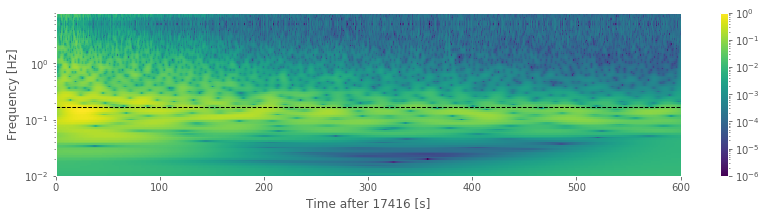

In [96]:
f_min = 0.01
f_max = 8
w0 = 10 #parameter for the wavelet, tradeoff between time and frequency resolution

scalogram = cwt(p_trunc, dt, w0, f_min, f_max)

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)

x, y = np.meshgrid(t_trunc,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
scalonorm = np.abs(scalogram)/np.amax(abs(scalogram)) #normalize scalogram

p1 = ax.pcolormesh(x, y, np.abs(scalonorm), cmap=obspy_sequential, norm=colors.LogNorm(vmin=1e-6, vmax=1))

#dotted lines corresponding to the frequencies
plt.axhline(y=0.165,color='black',ls='--',lw=1) 
#plt.axhline(y=0.138,color='black',ls='--',lw=1) 

ax.set_xlabel("Time after 17416 [s]")
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.colorbar(p1)
savefig('pg1spec.png')

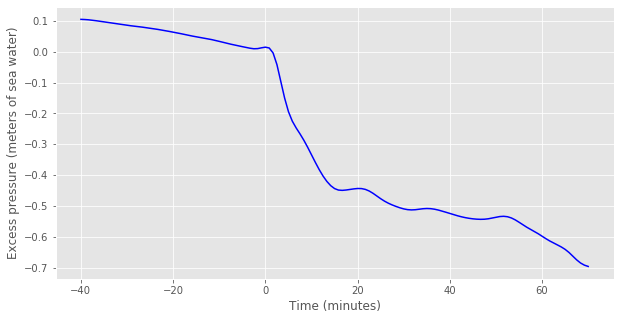

In [97]:
# plot running average over window
j = where(logical_and(t>=-40*60,t<=70*60))[0]
tt = t[j] 
pp = p[j]
# depth = 2283m = 1.522 sec, dt= 0.1 sec, 1.522*10=15.22

width = 10**-4 #width of gaussian

#gaussian
tts = tt-min(tt)
t_incr = arange(min(tts),max(tts)+1,50)
pw = zeros(len(t_incr))

for jj in range(0,len(t_incr)):
    window = np.exp(-width*np.power((tts-t_incr[jj]),2));
    windowed = np.multiply(pp,window)
    
    pw[jj] = sum(windowed)/sum(window)

plt.figure(figsize=(10,5))
plot((t_incr+min(tt))/60., pw,'b')    

xlabel('Time (minutes)')
ylabel('Excess pressure (meters of sea water)')
savefig('pg1height.png')

## PG2

In [98]:
d2 = loadtxt('kpg2.tp.txt')
t20 = 17416.
t2 = (d2[:,0] - t20) # seconds post event
dt = 0.1

In [99]:
kmean = where(logical_and(t2>-3, t2<0))[0]
pmean = mean(d2[kmean,1])
print('pmean = %g, mean(d[:,1]) = %g' % (pmean,mean(d2[:,1])))
p2 = (d2[:,1] - pmean) / (9.81*1025)  # excess pressure in m sea water

pmean = 2.25629e+07, mean(d[:,1]) = 2.25592e+07


Text(0, 0.5, 'Excess pressure (meters of sea water)')

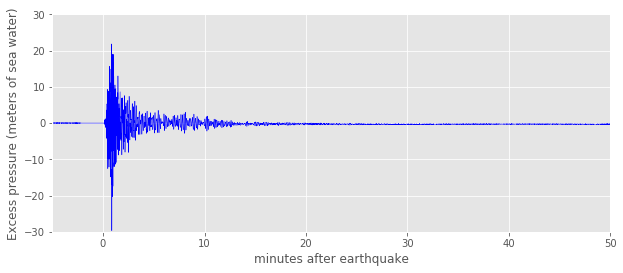

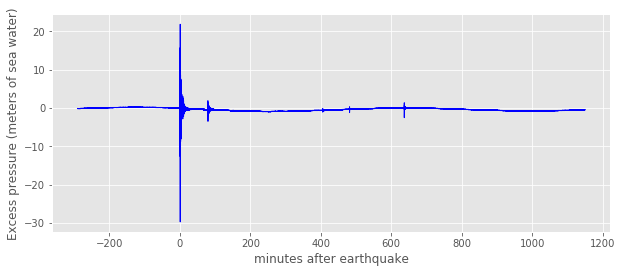

In [100]:
figure(1, figsize=(10,4))
clf()
plot(t2/60.,p2,'b',linewidth=0.5)
xlim(-5,50)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

figure(2, figsize=(10,4))
clf()
plot(t2/60.,p2,'b',linewidth=1.0)

grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

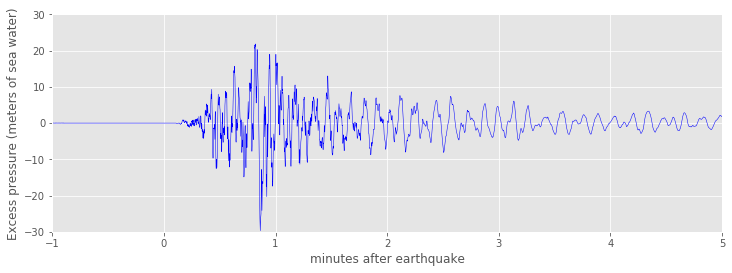

In [101]:
plt.style.use('ggplot')
figure(1, figsize=(12,4))
clf()
plot(t2[173560:177161]/60.,p2[173560:177161],'b',linewidth=0.5)
xlim(-1,5)
ylim(-30,30)
grid(True)
xlabel('minutes after earthquake')
ylabel('Excess pressure (meters of sea water)')

savefig('pg2sig_png')

In [102]:
#truncating the data for the spectrogram
p_trunc2 = p2[174160:180161]
t_trunc2 = t2[174160:180161]

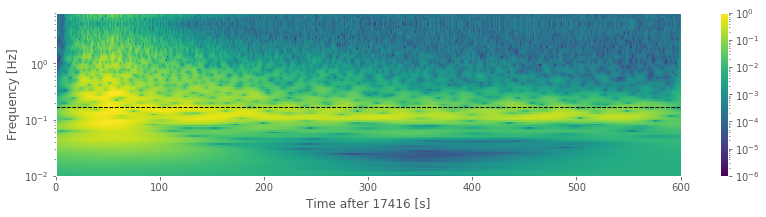

In [103]:
f_min = 0.01
f_max = 8
w0 = 10 #parameter for the wavelet, tradeoff between time and frequency resolution

scalogram = cwt(p_trunc2, dt, w0, f_min, f_max)

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)

x, y = np.meshgrid(t_trunc2,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
scalonorm = np.abs(scalogram)/np.amax(abs(scalogram)) #normalize scalogram

p1 = ax.pcolormesh(x, y, np.abs(scalonorm), cmap=obspy_sequential, norm=colors.LogNorm(1e-6, vmax=1))

#dotted lines corresponding to the frequencies
plt.axhline(y=0.165,color='black',ls='--',lw=1) 
#plt.axhline(y=0.138,color='black',ls='--',lw=1) 

ax.set_xlabel("Time after 17416 [s]")
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.colorbar(p1)

savefig('pg2spec.png')

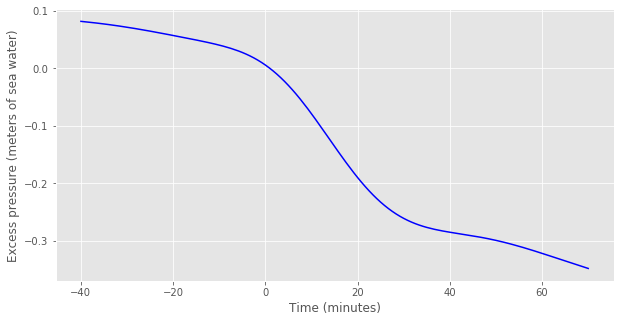

In [104]:
# plot running average over window
j = where(logical_and(t2>=-40*60,t2<=70*60))[0]
tt = t2[j] 
pp = p2[j]
# depth = 2283m = 1.522 sec, dt= 0.1 sec, 1.522*10=15.22

width = 10**-6 #width of gaussian

#gaussian
tts = tt-min(tt)
t_incr = arange(min(tts),max(tts)+1,50)
pw = zeros(len(t_incr))

for jj in range(0,len(t_incr)):
    window = np.exp(-width*np.power((tts-t_incr[jj]),2));
    windowed = np.multiply(pp,window)
    
    pw[jj] = sum(windowed)/sum(window)

plt.figure(figsize=(10,5))
plot((t_incr+min(tt))/60., pw,'b')    

xlabel('Time (minutes)')
ylabel('Excess pressure (meters of sea water)')

savefig('pg2height.png')

## 2018-11-30 M7.1 Alaska

Finding events in the area. We will use the 2018-11-30 event

2 Event(s) in Catalog:
2018-12-31T02:35:37.670000Z | +54.427, -161.513 | 6.0 Mww
2018-11-30T17:29:29.330000Z | +61.346, -149.955 | 7.0 mww


C:\Users\Chris\Anaconda3\envs\obspy\lib\site-packages\obspy\imaging\maps.py:343: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  ax=ax)
C:\Users\Chris\Anaconda3\envs\obspy\lib\site-packages\obspy\imaging\maps.py:435: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  bmap.drawcountries(color="0.75")


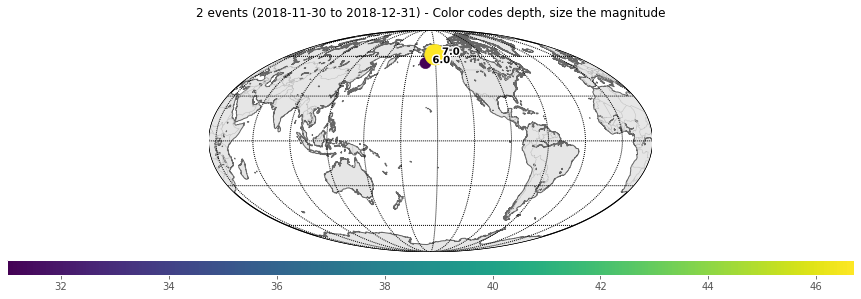

In [75]:
t1 = obspy.UTCDateTime("2018-05-01T00:00:00") 
t2 = obspy.UTCDateTime("2019-08-01T00:00:00") 
catalog = client.get_events(starttime=t1, endtime=t2,
                            minlatitude=52,
                            maxlatitude=62,
                            minlongitude=-170,
                            maxlongitude=-130,
                            minmagnitude=6.)
print(catalog)
catalog.plot();

We will use data from the following station as it has pressure gauges 
http://ds.iris.edu/mda/XO/WS74/?starttime=2018-07-21&endtime=2019-08-29

In [76]:
t = obspy.UTCDateTime("2018-11-30T17:29:29.33Z")
s = client.get_waveforms("XO", "WS74", "*", "?DH",t - 30, t + 20 * 60)
print(s)

2 Trace(s) in Stream:
XO.WS74..BDH | 2018-11-30T17:28:59.341900Z - 2018-11-30T17:49:29.316900Z | 40.0 Hz, 49200 samples
XO.WS74..LDH | 2018-11-30T17:28:59.816900Z - 2018-11-30T17:49:28.816900Z | 1.0 Hz, 1230 samples


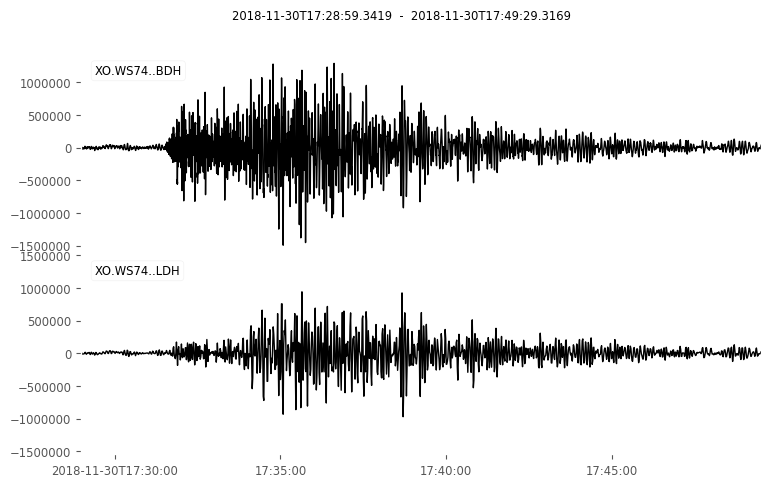

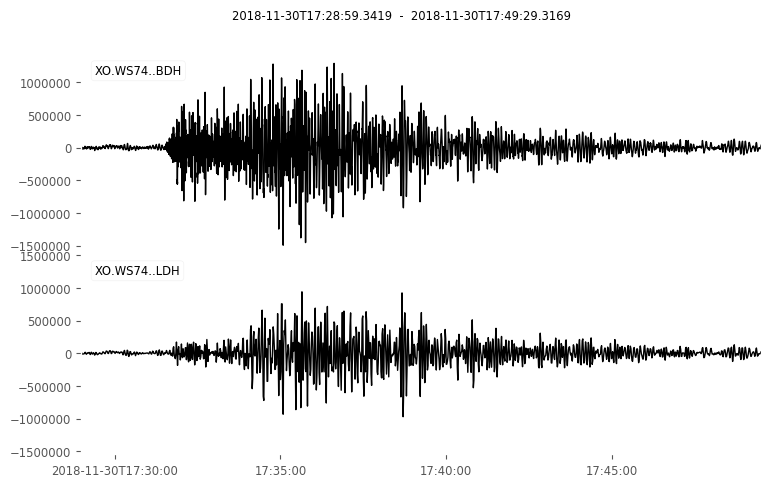

In [77]:
s.plot()

In [78]:
bdh = s[0]
ldh = s[1]

## BDH 

In [79]:
print(bdh.stats)

               network: XO
               station: WS74
              location: 
               channel: BDH
             starttime: 2018-11-30T17:28:59.341900Z
               endtime: 2018-11-30T17:49:29.316900Z
         sampling_rate: 40.0
                 delta: 0.025
                  npts: 49200
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 31, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 135168})


In [80]:
bdh_p = (bdh.data - mean(bdh.data))/(9.81*1000)
bdh_t = arange(49200)/40
dt = 0.025

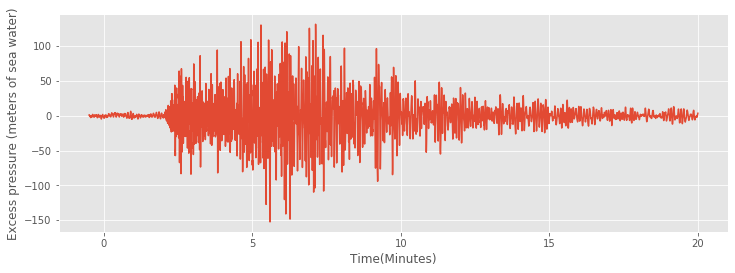

In [81]:
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = 12, 4

plot((bdh_t-30)/60,bdh_p)
xlabel('Time(Minutes)')
ylabel('Excess pressure (meters of sea water)')

savefig('bdhsig_png')

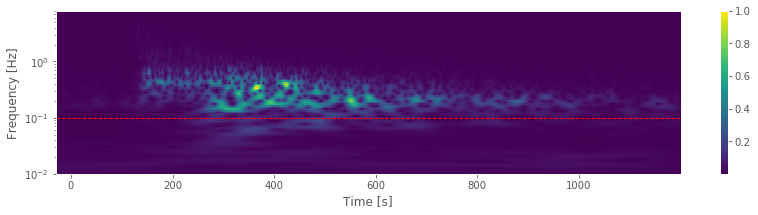

In [82]:
f_min = 0.01
f_max = 8
w0 = 10 #parameter for the wavelet, tradeoff between time and frequency resolution

scalogram = cwt(bdh_p, dt, w0, f_min, f_max)

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)

x, y = np.meshgrid(bdh_t-30,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
scalonorm = np.abs(scalogram)/np.amax(abs(scalogram)) #normalize scalogram

p1 = ax.pcolormesh(x, y, np.abs(scalonorm), cmap=obspy_sequential)

#dotted lines corresponding to the frequencies
plt.axhline(y=0.1,color='red',ls='--',lw=1) 

ax.set_xlabel("Time [s]")
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.colorbar(p1)

savefig('bdhspec.png')

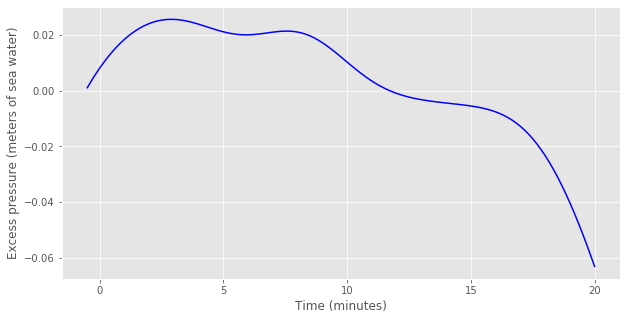

In [83]:
# plot running average over window
width = 10**-4.5 #width of gaussian

#gaussian
tts = bdh_t
t_incr = arange(min(tts),max(tts)+1,10)
pw = zeros(len(t_incr))

for jj in range(0,len(t_incr)):
    window = np.exp(-width*np.power((tts-t_incr[jj]),2));
    windowed = np.multiply(bdh_p,window)
    
    pw[jj] = sum(windowed)/sum(window)

plt.figure(figsize=(10,5))
plot((t_incr-30)/60., pw,'b')    

xlabel('Time (minutes)')
ylabel('Excess pressure (meters of sea water)')

savefig('bdhheight.png')

## LDH

In [84]:
print(ldh.stats)

               network: XO
               station: WS74
              location: 
               channel: LDH
             starttime: 2018-11-30T17:28:59.816900Z
               endtime: 2018-11-30T17:49:28.816900Z
         sampling_rate: 1.0
                 delta: 1.0
                  npts: 1230
                 calib: 1.0
_fdsnws_dataselect_url: http://service.iris.edu/fdsnws/dataselect/1/query
               _format: MSEED
                 mseed: AttribDict({'dataquality': 'M', 'number_of_records': 2, 'encoding': 'STEIM2', 'byteorder': '>', 'record_length': 4096, 'filesize': 135168})


In [85]:
ldh_p = (ldh.data - mean(ldh.data))/(9.81*1000)
ldh_t = arange(1230)
dt = 1

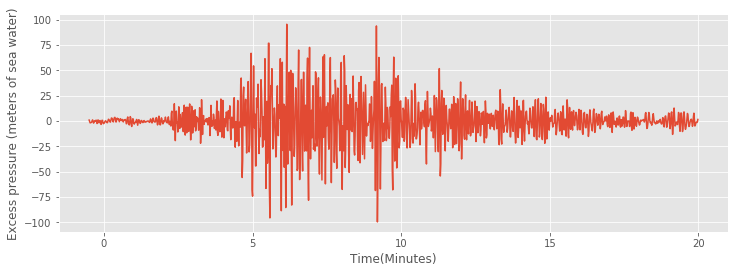

In [86]:
plot((ldh_t-30)/60,ldh_p)
xlabel('Time(Minutes)')
ylabel('Excess pressure (meters of sea water)')

savefig('ldhsig_png')

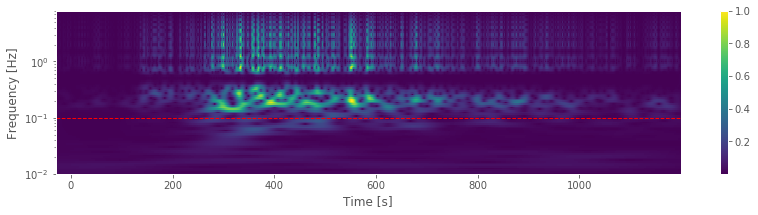

In [87]:
f_min = 0.01
f_max = 8
w0 = 10 #parameter for the wavelet, tradeoff between time and frequency resolution

scalogram = cwt(ldh_p, dt, w0, f_min, f_max)

fig = plt.figure(figsize=(14,3))
ax = fig.add_subplot(111)

x, y = np.meshgrid(ldh_t-30,np.logspace(np.log10(f_min), np.log10(f_max), scalogram.shape[0]))
scalonorm = np.abs(scalogram)/np.amax(abs(scalogram)) #normalize scalogram

p1 = ax.pcolormesh(x, y, np.abs(scalonorm), cmap=obspy_sequential)

#dotted lines corresponding to the frequencies
plt.axhline(y=0.1,color='red',ls='--',lw=1) 

ax.set_xlabel("Time [s]")
ax.set_ylabel("Frequency [Hz]")
ax.set_yscale('log')
ax.set_ylim(f_min, f_max)
plt.colorbar(p1)

savefig('ldhspec.png')

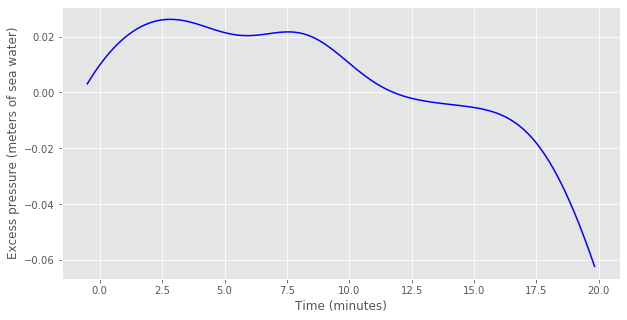

In [88]:
# plot running average over window
width = 10**-4.5 #width of gaussian

#gaussian
tts = ldh_t
t_incr = arange(min(tts),max(tts)+1,10)
pw = zeros(len(t_incr))

for jj in range(0,len(t_incr)):
    window = np.exp(-width*np.power((tts-t_incr[jj]),2));
    windowed = np.multiply(ldh_p,window)
    
    pw[jj] = sum(windowed)/sum(window)

plt.figure(figsize=(10,5))
plot((t_incr-30)/60., pw,'b')    

xlabel('Time (minutes)')
ylabel('Excess pressure (meters of sea water)')

savefig('ldhheight.png')